In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 
from pylab import rcParams
rcParams["figure.figsize"]=30,16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
d1 = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/v11_3.xlsx", sheet_name = 'ren_ln_orig')
d1.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc5,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6
0,0062M00000gYqZQQA0,LCFLN202208126653,0062M00000gYqZQQA0,1.069630e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,560.0,B078,B026,B063,B074,NaN,NaN
1,0062M00000gYSpGQAW,LCFLN202208126658,0062M00000gYSpGQAW,5.004454e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,723.0,B069,B063,B031,B066,NaN,NaN
2,0062M00000gYsQcQAK,LCFLN202208126659,0062M00000gYsQcQAK,9.550183e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,702.0,B034,B052,B036,B037,NaN,NaN
3,0062M00000n0BEfQAM,LCFLN202208130965,0062M00000n0BEfQAM,1.619373e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,562.0,B078,B026,B074,B063,NaN,NaN
4,0062M00000gYTaCQAW,LCFLN202208126663,0062M00000gYTaCQAW,2.354679e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,SLBO1702_0_2,573.0,B063,B026,B078,B074,NaN,NaN


In [4]:
d1.shape

(3382, 392)

In [5]:
d2 = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/v11_3.xlsx", sheet_name = 'Ren_orig')
d2.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000mTGVnQAO,2021-08-05 13:37:09,2021-08-10,Altitude Solutions Professional Services-New D...,0062M00000mhN0JQAU,Default,20.0,0.05,616.0,1.0,...,Services,"87 - Engineering, Accounting, Research, Manage...",0.0,NaN,-1.095377,2.337393,40417.822000,5474.06,-86.456316,Negative
1,0062M00000o96yhQAA,2022-01-14 16:05:25,2022-01-25,Dirty Dogs Self Service Dog Wash-New Deal-0114...,0062M00000ltrQ8QAI,Default,100.0,1.67,0.0,1.0,...,"Agriculture, Forestry, Fishing",07 - Agricultural Services,0.5,1.0,0.212900,0.465903,24938.318000,18952.29,-24.003342,Negative
2,0062M00000mfz6iQAA,2021-04-13 22:11:26,2021-04-19,Mana + Pua-Renewal Deal-04132021,0062M00000lvkcZQAQ,Other,100.0,0.65,513.0,1.0,...,Wholesale,51 - Wholesale Trade-Nondurable Good,2.0,2.0,0.151461,0.224922,67682.077777,46977.49,-30.590949,Negative
3,0062M00000lVi6gQAC,2020-10-01 18:18:23,2020-10-02,World Wide Windows-Renewal Deal-10012020,0062M00000jzxQuQAI,Other,100.0,1.00,517.0,1.0,...,Construction,17 - Construction Special Trade Contractors,0.0,0.0,-0.400179,0.337464,19060.590000,6068.49,-68.162108,Negative
4,0062M00000mg31dQAA,2021-04-14 17:48:32,2021-04-14,Tullus Properties-Renewal Deal-04142021,0062M00000lxWpgQAE,Other,100.0,0.50,599.0,1.0,...,"Finance, Insurance, Real Estate",65 - Real Estate,0.0,0.0,0.130666,0.050887,50438.125714,60408.48,19.767487,Positive


In [6]:
d2.shape

(3539, 55)

In [7]:
d2['OpportunityID']

0       0062M00000mTGVnQAO
1       0062M00000o96yhQAA
2       0062M00000mfz6iQAA
3       0062M00000lVi6gQAC
4       0062M00000mg31dQAA
               ...        
3534    0062M00000oY7fdQAC
3535    0062M00000bmKPLQA2
3536    0062M00000bmhkAQAQ
3537    0062M00000lWtjxQAC
3538    0062M00000bnAyFQAU
Name: OpportunityID, Length: 3539, dtype: object

In [ ]:
d2['WriteOff_YN']

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3534    1.0
3535    1.0
3536    1.0
3537    0.0
3538    1.0
Name: WriteOff_YN, Length: 3539, dtype: float64

In [8]:
data = pd.merge(d1, d2[['OpportunityID','WriteOff_YN']], on = 'OpportunityID')
data.head()

,OpportunityID_ren,accountnumber,OpportunityID,lnlexidsele,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,...,model1rc6,model2name,model2score,model2rc1,model2rc2,model2rc3,model2rc4,model2rc5,model2rc6,WriteOff_YN
0,0062M00000gYqZQQA0,LCFLN202208126653,0062M00000gYqZQQA0,1.069630e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,560.0,B078,B026,B063,B074,NaN,NaN,0.0
1,0062M00000gYSpGQAW,LCFLN202208126658,0062M00000gYSpGQAW,5.004454e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,723.0,B069,B063,B031,B066,NaN,NaN,0.0
2,0062M00000gYsQcQAK,LCFLN202208126659,0062M00000gYsQcQAK,9.550183e+10,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,702.0,B034,B052,B036,B037,NaN,NaN,0.0
3,0062M00000n0BEfQAM,LCFLN202208130965,0062M00000n0BEfQAM,1.619373e+08,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,562.0,B078,B026,B074,B063,NaN,NaN,0.0
4,0062M00000gYTaCQAW,LCFLN202208126663,0062M00000gYTaCQAW,2.354679e+07,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,SLBO1702_0_2,573.0,B063,B026,B078,B074,NaN,NaN,1.0


In [ ]:
for i in data.columns:
  print(i)

OpportunityID_ren
accountnumber
OpportunityID
lnlexidsele
inputcheckbusname
inputcheckbusaltname
inputcheckbusaddr
inputcheckbuscity
inputcheckbusstate
inputcheckbuszip
inputcheckbusTIN
inputcheckbusphone
inputcheckbusfax
inputcheckbusnaics
inputcheckbussic
inputcheckbusage
inputcheckauthrepfirstname
inputcheckauthrepmiddlename
inputcheckauthreplastname
inputcheckauthrepaddr
inputcheckauthrepcity
inputcheckauthrepstate
inputcheckauthrepzip
inputcheckauthrepssn
inputcheckauthrepphone
inputcheckauthrepage
inputcheckauthrepdob
inputcheckauthrepdl
inputcheckauthrepdlstate
inputcheckauthrep2firstname
inputcheckauthrep2middlename
inputcheckauthrep2lastname
inputcheckauthrep2addr
inputcheckauthrep2city
inputcheckauthrep2state
inputcheckauthrep2zip
inputcheckauthrep2ssn
inputcheckauthrep2phone
inputcheckauthrep2age
inputcheckauthrep2dob
inputcheckauthrep2dl
inputcheckauthrep2dlstate
inputcheckauthrep3firstname
inputcheckauthrep3middlename
inputcheckauthrep3lastname
inputcheckauthrep3addr
input

In [9]:
input_check = ['inputcheckbusname',
              'inputcheckbusaltname',
              'inputcheckbusaddr',
              'inputcheckbuscity',
              'inputcheckbusstate',
              'inputcheckbuszip',
              'inputcheckbusTIN',
              'inputcheckbusphone',
              'inputcheckbusfax',
              'inputcheckbusnaics',
              'inputcheckbussic',
              'inputcheckbusage',
              'inputcheckauthrepfirstname',
              'inputcheckauthrepmiddlename',
              'inputcheckauthreplastname',
              'inputcheckauthrepaddr',
              'inputcheckauthrepcity',
              'inputcheckauthrepstate',
              'inputcheckauthrepzip',
              'inputcheckauthrepssn',
              'inputcheckauthrepphone',
              'inputcheckauthrepage',
              'inputcheckauthrepdob',
              'inputcheckauthrepdl',
              'inputcheckauthrepdlstate',
              'inputcheckauthrep2firstname',
              'inputcheckauthrep2middlename',
              'inputcheckauthrep2lastname',
              'inputcheckauthrep2addr',
              'inputcheckauthrep2city',
              'inputcheckauthrep2state',
              'inputcheckauthrep2zip',
              'inputcheckauthrep2ssn',
              'inputcheckauthrep2phone',
              'inputcheckauthrep2age',
              'inputcheckauthrep2dob',
              'inputcheckauthrep2dl',
              'inputcheckauthrep2dlstate',
              'inputcheckauthrep3firstname',
              'inputcheckauthrep3middlename',
              'inputcheckauthrep3lastname',
              'inputcheckauthrep3addr',
              'inputcheckauthrep3city',
              'inputcheckauthrep3state',
              'inputcheckauthrep3zip',
              'inputcheckauthrep3ssn',
              'inputcheckauthrep3phone',
              'inputcheckauthrep3age',
              'inputcheckauthrep3dob',
              'inputcheckauthrep3dl',
              'inputcheckauthrep3dlstate', 'WriteOff_YN', 'OpportunityID']

In [10]:
len(input_check)

53

In [11]:
input_chk = data[input_check]
input_chk.head()

,inputcheckbusname,inputcheckbusaltname,inputcheckbusaddr,inputcheckbuscity,inputcheckbusstate,inputcheckbuszip,inputcheckbusTIN,inputcheckbusphone,inputcheckbusfax,inputcheckbusnaics,...,inputcheckauthrep3state,inputcheckauthrep3zip,inputcheckauthrep3ssn,inputcheckauthrep3phone,inputcheckauthrep3age,inputcheckauthrep3dob,inputcheckauthrep3dl,inputcheckauthrep3dlstate,WriteOff_YN,OpportunityID
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0062M00000gYqZQQA0
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0062M00000gYSpGQAW
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0062M00000gYsQcQAK
3,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0062M00000n0BEfQAM
4,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0062M00000gYTaCQAW


## Checking Missing Values

In [12]:
def missing_val(df_feature):
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('**************************************************************************************')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')

In [13]:
missing_val(input_chk)

Missing values in attribute : 

inputcheckbusname               0
inputcheckbusaltname            0
inputcheckbusaddr               0
inputcheckbuscity               0
inputcheckbusstate              0
inputcheckbuszip                0
inputcheckbusTIN                0
inputcheckbusphone              0
inputcheckbusfax                0
inputcheckbusnaics              0
inputcheckbussic                0
inputcheckbusage                0
inputcheckauthrepfirstname      0
inputcheckauthrepmiddlename     0
inputcheckauthreplastname       0
inputcheckauthrepaddr           0
inputcheckauthrepcity           0
inputcheckauthrepstate          0
inputcheckauthrepzip            0
inputcheckauthrepssn            0
inputcheckauthrepphone          0
inputcheckauthrepage            0
inputcheckauthrepdob            0
inputcheckauthrepdl             0
inputcheckauthrepdlstate        0
inputcheckauthrep2firstname     0
inputcheckauthrep2middlename    0
inputcheckauthrep2lastname      0
inputcheckauthre

## Checking Unique Values

In [14]:
def unique_value_counts(df_feature):
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts())
  print('\n')
  print('**************************************************************************************')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique())
  print('\n')

In [15]:
for col in input_chk:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  unique_value_counts(input_chk[col])

attribute_name : inputcheckbusname
Value counts of attribute : 

1.0    3382
Name: inputcheckbusname, dtype: int64


**************************************************************************************
Unique number of attribute : 

[1.]


attribute_name : inputcheckbusaltname
Value counts of attribute : 

0.0    3382
Name: inputcheckbusaltname, dtype: int64


**************************************************************************************
Unique number of attribute : 

[0.]


attribute_name : inputcheckbusaddr
Value counts of attribute : 

1.0    3382
Name: inputcheckbusaddr, dtype: int64


**************************************************************************************
Unique number of attribute : 

[1.]


attribute_name : inputcheckbuscity
Value counts of attribute : 

1.0    3381
0.0       1
Name: inputcheckbuscity, dtype: int64


**************************************************************************************
Unique number of attribute : 

[1. 0.]


attribute_n

## Checking correaltion w. r. to WriteOff_YN 

In [16]:
def corr(df_features):
  for i in input_chk.corr()['WriteOff_YN'].sort_values().index:
    a = f'{i:50}{round(input_chk.corr()["WriteOff_YN"][i], 3)}'
    print(a)
  print('\n')
  plt.figure(figsize = (18,8))
  plt.title('Correlation w. r. to WriteOff_YN')
  sns.countplot(round(input_chk.corr()["WriteOff_YN"].sort_values(), 3))
  plt.xlabel('Corr w. r. to WriteOff_YN')
  plt.ylabel('No. of attributes(Count)')

inputcheckbusphone                                -0.046
inputcheckbuscity                                 -0.029
inputcheckauthrepphone                            -0.028
inputcheckauthrepstate                            -0.021
inputcheckauthrepaddr                             -0.011
inputcheckauthrepcity                             -0.011
inputcheckauthrepzip                              -0.008
inputcheckauthrepssn                              0.022
inputcheckbuszip                                  0.023
inputcheckauthrepdob                              0.033
WriteOff_YN                                       1.0
inputcheckbusname                                 nan
inputcheckbusaltname                              nan
inputcheckbusaddr                                 nan
inputcheckbusstate                                nan
inputcheckbusTIN                                  nan
inputcheckbusfax                                  nan
inputcheckbusnaics                                nan
i

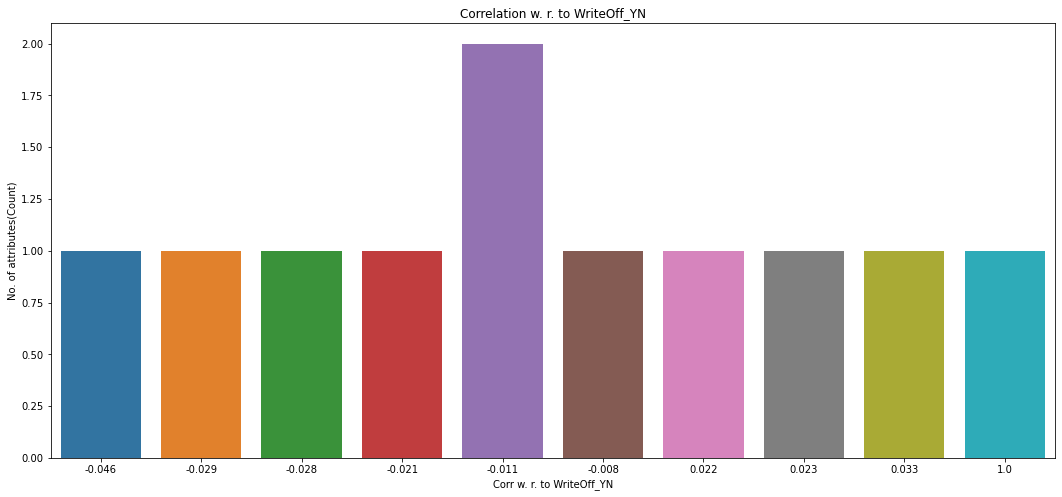

In [17]:
corr(input_chk)

## Checking feature variance 

In [21]:
input_chk['inputcheckbuscity'].value_counts()

1.0    3381
0.0       1
Name: inputcheckbuscity, dtype: int64

In [24]:
input_chk['inputcheckbusstate'].value_counts()


1.0    3382
Name: inputcheckbusstate, dtype: int64

In [27]:
input_chk['inputcheckauthrepdob'].value_counts()

7.0    2986
0.0     396
Name: inputcheckauthrepdob, dtype: int64

In [26]:
input_chk['inputcheckbusphone'].value_counts()

1.0    2954
0.0     428
Name: inputcheckbusphone, dtype: int64

In [22]:
def variance(df_features):
  var = df_features.var()
  print(var)

In [23]:
variance(input_chk)

inputcheckbusname               0.000000
inputcheckbusaltname            0.000000
inputcheckbusaddr               0.000000
inputcheckbuscity               0.000296
inputcheckbusstate              0.000000
inputcheckbuszip                0.001477
inputcheckbusTIN                0.000000
inputcheckbusphone              0.110570
inputcheckbusfax                0.000000
inputcheckbusnaics              0.000000
inputcheckbussic                0.000000
inputcheckbusage                0.000000
inputcheckauthrepfirstname      0.000000
inputcheckauthrepmiddlename     0.000000
inputcheckauthreplastname       0.000000
inputcheckauthrepaddr           0.005296
inputcheckauthrepcity           0.005296
inputcheckauthrepstate          0.006173
inputcheckauthrepzip            0.002655
inputcheckauthrepssn            0.004710
inputcheckauthrepphone          0.229672
inputcheckauthrepage            0.000000
inputcheckauthrepdob            5.067133
inputcheckauthrepdl             0.000000
inputcheckauthre

In [ ]:
input_chk['inputcheckauthrepdob'][:20]

0     7.0
1     7.0
2     7.0
3     7.0
4     0.0
5     7.0
6     7.0
7     7.0
8     7.0
9     7.0
10    7.0
11    7.0
12    7.0
13    7.0
14    7.0
15    0.0
16    7.0
17    7.0
18    7.0
19    7.0
Name: inputcheckauthrepdob, dtype: float64

In [ ]:
input_chk['inputcheckauthrepdob'].value_counts()

7.0    2986
0.0     396
Name: inputcheckauthrepdob, dtype: int64